PANDAS SERIES
Project - 1 : Sales Analysis

In [2]:
### importing libraries
import pandas as pd
import os

In [3]:
# reading 1 files
df = pd.read_csv(r"C:\Users\manoj.c\Downloads\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_April_2019.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
# need to merge all 12 files so used import os and first lets read
files = [file for file in os.listdir('C:\\Users\\manoj.c\\Downloads\\Pandas-Data-Science-Tasks-master\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\') if file.endswith('csv')]
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [5]:
## Now lets merge
## here just filename gets error , so need to use the folder path
folder_path = r'C:\Users\manoj.c\Downloads\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data'
files = os.listdir(folder_path)
df_list = []
for file in files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    df_list.append(df)

combined_df = pd.concat(df_list, ignore_index=True)
combined_df.to_csv("Combined Sales Data", index=False)

In [6]:
combined_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [7]:
# Lets create one more column with defined value
combined_df['Month'] = 3
combined_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",3
1,NaN,NaN,NaN,NaN,NaN,NaN,3
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",3
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",3
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",3


In [8]:
# Now lets give dynamic value
combined_df['Month'] = combined_df['Order Date']. str[0:2]
combined_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04


In [9]:
# Now lets convert its datatype
print(combined_df['Month'].dtype)

# object to int
combined_df['Month'].astype("int32")
# unable to convert bcoz of this ValueError: cannot convert float NaN to integer

object


ValueError: cannot convert float NaN to integer

In [ ]:
# data cleaning
nan_df = combined_df[combined_df.isna().any(axis=1)]
nan_df.head(50)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour,Minute


In [11]:
# lets drop all this
combined_df = combined_df.dropna(how='all')
combined_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [12]:
## Check is any NaN values exist in entire DataFrame:
has_nan = combined_df.isnull().any().any()
print("Are there any NaN's in df ? ",has_nan)

Are there any NaN's in df ?  False


In [13]:
## after deleting all NaN's let convert month data type again befor that lets do data cleaning bcoz.. Month column has few 'Or'
temp_df = combined_df[combined_df['Order Date'].str[0:2] == 'Or']
temp_df.head(50)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
3036,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
3209,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
3618,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
4138,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
4645,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [14]:
combined_df = combined_df[combined_df['Order Date'].str[0:2] != 'Or']
combined_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [15]:
## After doing everything lets do this again
combined_df['Month'] = combined_df['Month'].astype("int32")
combined_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [16]:
print(combined_df['Month'].dtype)
print(combined_df['Quantity Ordered'].dtype)
print(combined_df['Price Each'].dtype)

int32
object
object


In [17]:
## Let's create Sales column & convert data type to other columns aswell
combined_df['Quantity Ordered'] = pd.to_numeric(combined_df['Quantity Ordered'])
combined_df['Price Each'] = pd.to_numeric(combined_df['Price Each'])

In [18]:
print(combined_df['Month'].dtype)
print(combined_df['Quantity Ordered'].dtype)
print(combined_df['Price Each'].dtype)

int32
int64
float64


In [19]:
combined_df['Sales'] = combined_df['Quantity Ordered'] * combined_df['Price Each']

In [20]:
combined_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [21]:
# Sales column going  to last need to re-arrange this
cols = list(combined_df)
cols.remove('Sales')
cols.insert(4, 'Sales')
combined_df = combined_df.reindex(columns=cols)

In [22]:
combined_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


Question 1: What was the best month for sales? How much was earned that month?

In [23]:
monthly_sales = combined_df.groupby('Month').sum(numeric_only=True)
print(monthly_sales)

       Quantity Ordered  Price Each       Sales
Month                                          
1                 10903  1811768.38  1822256.73
2                 13449  2188884.72  2202022.42
3                 17005  2791207.83  2807100.38
4                 20558  3367671.02  3390670.24
5                 18667  3135125.13  3152606.75
6                 15253  2562025.61  2577802.26
7                 16072  2632539.56  2647775.76
8                 13448  2230345.42  2244467.88
9                 13109  2084992.09  2097560.13
10                22703  3715554.83  3736726.88
11                19798  3180600.68  3199603.20
12                28114  4588415.41  4613443.34


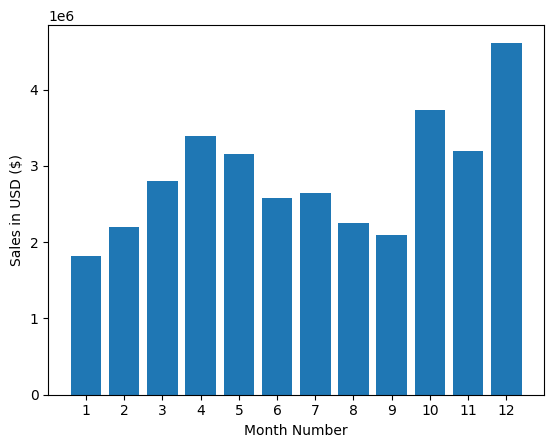

In [24]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months, monthly_sales['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month Number')
plt.show()

Question 2 : Which city had the highest number of Sales?

In [25]:
## Extract & create city column first 
combined_df['City'] = combined_df['Purchase Address'].apply(lambda x: x.split(',')[1])
combined_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles


In [26]:
## Another way of writing it
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

combined_df['City'] = combined_df['Purchase Address'].apply(lambda x: get_city(x) + ' ( ' + get_state(x) + ')')
combined_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas ( TX)
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston ( MA)
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles ( CA)
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles ( CA)
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles ( CA)


In [27]:
monthly_sales = combined_df.groupby('City').sum(numeric_only=True)
print(monthly_sales)

                     Quantity Ordered  Price Each       Sales   Month
City                                                                 
Atlanta ( GA)                   16602  2779908.20  2795498.58  104794
Austin ( TX)                    11153  1809873.61  1819581.75   69829
Boston ( MA)                    22528  3637409.77  3661642.01  141112
Dallas ( TX)                    16730  2752627.82  2767975.40  104620
Los Angeles ( CA)               33289  5421435.23  5452570.80  208325
New York City ( NY)             27932  4635370.83  4664317.43  175741
Portland ( ME)                   2750   447189.25   449758.27   17144
Portland ( OR)                  11303  1860558.22  1870732.34   70621
San Francisco ( CA)             50239  8211461.74  8262203.91  315520
Seattle ( WA)                   16553  2733296.01  2747755.48  104941


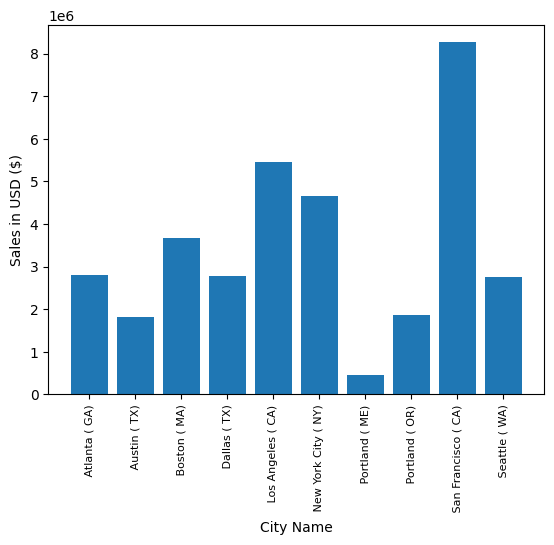

In [28]:
import matplotlib.pyplot as plt

## cities = combined_df['City'].unique()
## becuase of this there is inconsistency why ? for unique the order will be changed so..

cities = [ City for City, df in combined_df.groupby('City')]
plt.bar(cities, monthly_sales['Sales'])
plt.xticks(cities, rotation='vertical', size =8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.show()


Question 3: What time should we display advertisements to maximize likelhood of customer's buying product?

In [29]:
## To get Date check order date format then change
print(combined_df['Order Date'].dtype)

object


In [30]:
combined_df['Order Date'] = pd.to_datetime(combined_df['Order Date'])
print(combined_df['Order Date'].dtype)

C:\Users\manoj.c\AppData\Local\Temp\ipykernel_24528\422020450.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['Order Date'] = pd.to_datetime(combined_df['Order Date'])


datetime64[ns]


In [31]:
combined_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas ( TX)
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston ( MA)
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles ( CA)
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles ( CA)
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles ( CA)


In [32]:
## here i converted data & time, now lets separate hour , minute
combined_df['Hour'] = combined_df['Order Date'].dt.hour
combined_df['Minute'] = combined_df['Order Date'].dt.minute
combined_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas ( TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston ( MA),22,30
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles ( CA),14,38
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles ( CA),14,38
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles ( CA),9,27


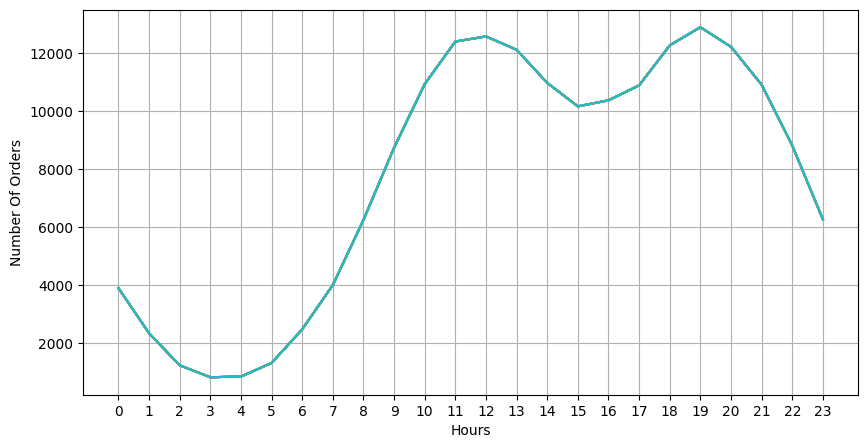

In [33]:
import matplotlib.pyplot as plt
hourly_orders = [ Hour for Hour, df in combined_df.groupby('Hour')]

plt.figure(figsize=(10,5))
plt.plot(hourly_orders,combined_df.groupby('Hour').count())
plt.grid(True)
plt.ylabel('Number Of Orders')
plt.xlabel('Hours')
plt.xticks(range(0,24))
plt.show()


## OUTPUT : My recommendation is 11 A.M , 12 A.M & 7 P.M

Question 4: What products are most often sold together ?

In [34]:
combined_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas ( TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston ( MA),22,30
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles ( CA),14,38
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles ( CA),14,38
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles ( CA),9,27


In [35]:
## looking at the order Id we can say , bcoz multiple product has same order id, order date & Purchase Address 
## Keep = False gives all duplicate data as well

df = combined_df[combined_df['Order ID'].duplicated(keep=False)]

## Now lets make a new column named called grouped with product names

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ',' .join(x))
df.head()

C:\Users\manoj.c\AppData\Local\Temp\ipykernel_24528\371612542.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ',' .join(x))


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour,Minute,Grouped
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles ( CA),14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles ( CA),14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles ( CA),19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles ( CA),19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,Boston ( MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [36]:
## Now lets group this together & drop it 
df = df[['Order ID','Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [37]:
## we want to know the count of product so using this method
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_lists = row.split(',')
    count.update(Counter(combinations(row_lists,2)))

for key, value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


Question 5 : What product sold the most? Why do you think it sold the most?

In [38]:
combined_df.head()

## by looking this we can think qunatity & product req

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas ( TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston ( MA),22,30
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles ( CA),14,38
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles ( CA),14,38
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles ( CA),9,27


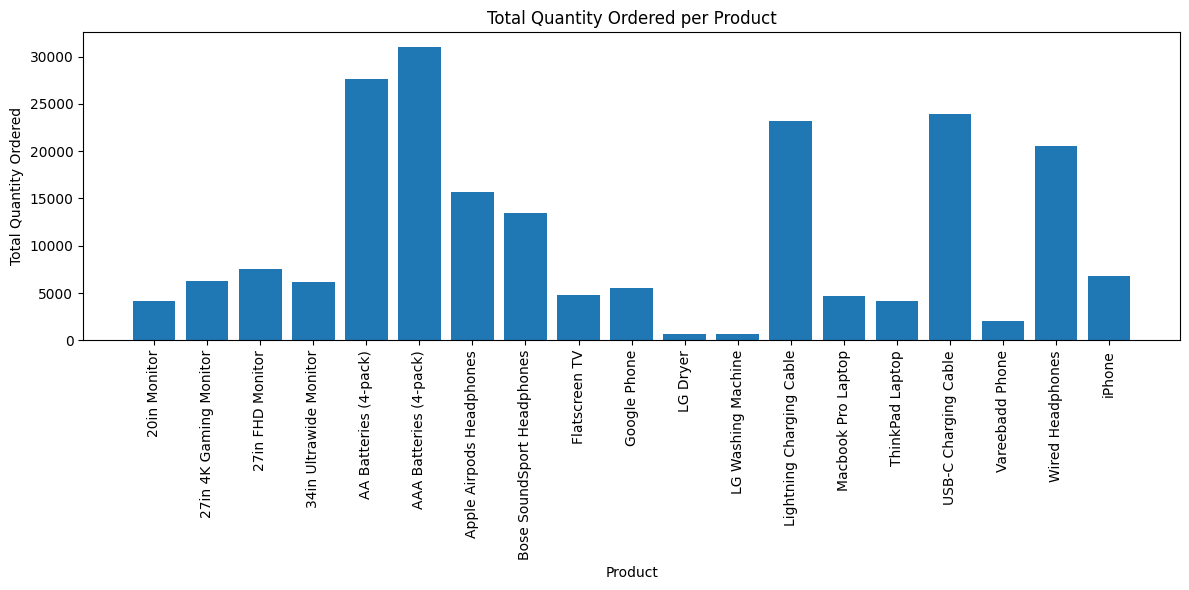

In [ ]:
import matplotlib.pyplot as plt

# Group by product and sum quantity
product_group = combined_df.groupby('Product')
quantity_ordered = product_group['Quantity Ordered'].sum()

# Get products and quantities
products = quantity_ordered.index
quantities = quantity_ordered.values

# Plot
plt.figure(figsize=(12, 6))
plt.bar(products, quantities)
plt.xticks(rotation='vertical')
plt.xlabel('Product')
plt.ylabel('Total Quantity Ordered')
plt.title('Total Quantity Ordered per Product')
plt.tight_layout()
plt.show()


## by looking below graph ,able to say which product sold most but for why? need to do more

In [43]:
## lets look for prices for each product
prices = combined_df.groupby('Product')['Price Each'].mean()
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


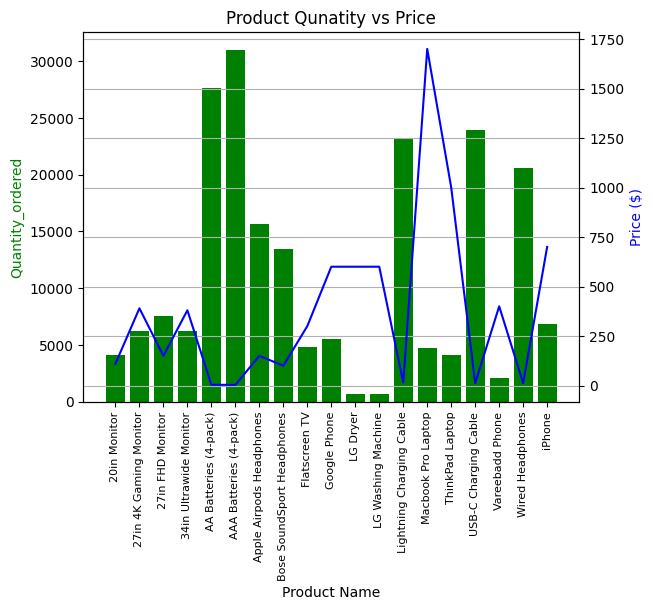

In [47]:
# lets add both in graph
prices = combined_df.groupby('Product')['Price Each'].mean()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color ='g')
ax2.plot(products,prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity_ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticks(range(len(products)))
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.title("Product Qunatity vs Price")
plt.tight_layout
plt.grid()
plt.show()